# Quantum teleportation 

In [1]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import numpy as np
from IPython.display import display, Math, Latex
%matplotlib inline
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

We already learned about the Bell states and how quantum entaglement works in case of quibts. But how to exploit this phenomenon to our advantage / how to do something cool? How about quantum teleportation? Today we will understand teleportation and also its truths - how efficient? faster than light?

Let's see the most basic example - teleporting a single qubit. In the Bell states, we saw that the 2 qubits were totally dependant on each other. Measuring one qubit instantly tells us about the other qubit, no matter how far they are, as long as they are entangled.  
Alice and Bob (the world's most famous cryptographic couple) met long ago but now live far apart. While together they generated an EPR pair, each taking one qubit of the EPR pair when they separated. Many years later, Bob is in hiding, and Alice’s mission, should she choose to accept it, is to deliver a qubit $|\psi\rangle$ to Bob. She does not know the state of the qubit, and moreover can only send classical information to Bob.
So let's make an EPR pair and give it to Alice and Bob!

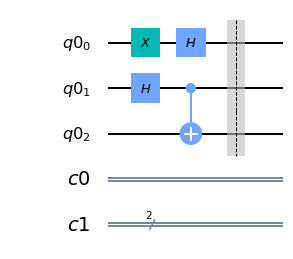

In [2]:
qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(2)  # we will need seperates registers for using 'c_if' later.
qc = QuantumCircuit(qr,crz,crx)
qc.x(0)
qc.h(0) # 'psi' can't be unknown to us as we are creating it here. Let us take '-' state as our 'psi'
# We will verify later if the '-' is been teleported.

qc.h(1)
qc.cx(1,2) # creating a bell state
qc.barrier() # Use barrier to separate steps, everything till this barrier is just intialisation.
qc.draw()

The state to be teleported is $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$, where $\alpha$ and $\beta$ are unknown amplitudes. The state input into the circuit $|\psi_0\rangle$ is   
$$|\psi_0\rangle=|\psi\rangle|\beta_{00}\rangle$$
The notation $|\beta_{00}\rangle$ represents the bell state prepared with the intial qubit state $|00\rangle$ that is $\frac{|00\rangle + |11\rangle}{\sqrt{2}}$.
<img src = 'https://raw.githubusercontent.com/mnp-club/Quantum_Computing_Workshop_2020/master/images/telep.jpeg' width = '800' height = '800'> </img>  
  
The two top lines represent Alice’s system, while the bottom line is Bob’s system. The meters represent measurement, and the double lines coming out of them carry classical bits (recall that single lines denote qubits).
$$|\psi_0\rangle=\frac{1}{\sqrt{2}}\left[\alpha|0\rangle(|00\rangle+|11\rangle) + \beta|1\rangle(|00\rangle+|11\rangle)\right]$$
where we use the convention that the ﬁrst two qubits (on the left) belong to Alice, and
the third qubit to Bob. As we explained previously, Alice’s second qubit and Bob’s qubit start out in an state. Alice sends her qubits through a CNOT gate, obtaining:
$$|\psi_1\rangle=\frac{1}{\sqrt{2}}\left[\alpha|0\rangle(|00\rangle+|11\rangle) + \beta|1\rangle(|10\rangle+|01\rangle)\right]$$


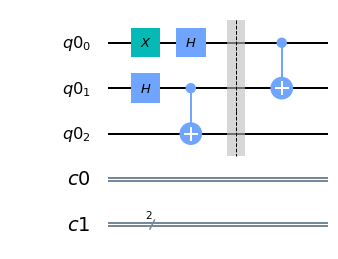

In [3]:
qc.cx(0,1) # '0' and '1' are with Alice and '2' is with Bob.
# psi_1 prepared.
qc.draw()

She then sends the ﬁrst qubit through a Hadamard gate, obtaining:
$$|\psi_2\rangle=\frac{1}{2}\left[\alpha(|0\rangle +|1\rangle)(|00\rangle+|11\rangle) + \beta(|0\rangle-|1\rangle)(|10\rangle+|01\rangle)\right]$$
This state may be re-written in the following way, simply by regrouping terms: 
$$|\psi_2\rangle=\frac{1}{2}[|00\rangle(\alpha|0\rangle+\beta|1\rangle)+|01\rangle(\alpha|1\rangle+\beta|0\rangle)+|10\rangle(\alpha|0\rangle-\beta|1\rangle+|11\rangle(\alpha|1\rangle-\beta|0\rangle)]$$


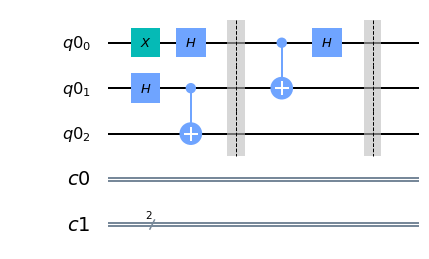

In [4]:
qc.h(0)
# psi_2 prepared.
qc.barrier()
qc.draw()

This expression naturally breaks down into four terms. The ﬁrst term has Alice’s qubits in the state $|00\rangle$, and Bob’s qubit in the state $\alpha|0\rangle+\beta|1\rangle$ – which is the original state $|\psi\rangle$.\\
 If Alice performs a measurement and obtains the result 00 then Bob’s system will be in the state $|\psi\rangle$.  Similarly, from the previous expression we can read off Bob’s post measurement state, given the result of Alice’s measurement:
 
$$00 \mapsto |\psi_3\rangle \equiv \alpha|0\rangle+\beta|1\rangle$$ 

$$01 \mapsto |\psi_3\rangle \equiv \alpha|1\rangle+\beta|0\rangle$$   

$$10 \mapsto |\psi_3\rangle \equiv \alpha|0\rangle-\beta|1\rangle$$  

$$11 \mapsto |\psi_3\rangle \equiv \alpha|1\rangle-\beta|0\rangle$$     

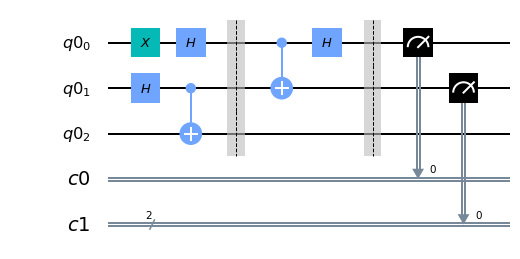

In [5]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw (output = 'mpl')

Bob can ‘ﬁx up’ his state, recovering $|\psi\rangle$, by applying the appropriate quantum gate. For example, in the case where the measurement yields $00$, Bob doesn’t need to do anything. If the measurement is $01$ then Bob can ﬁx up his state by applying the $X$ gate. If the measurement is $10$ then Bob can ﬁx up his state by applying the $Z$ gate. If the measurement is $11$ then Bob can ﬁx up his state by applying ﬁrst an $X$ and then a $Z$ gate.
Summing up, Bob needs to apply the transformation $Z^{M_1}X^{M_2}$(note how time goes from left to right in circuit diagrams, but in matrix products terms on the right happen ﬁrst) to his qubit, and he will recover the state $|\psi\rangle$.  

Here we got $ M_1 = 0$ and $M_2 = 1$. So lets do the final operation on the third state which Bob has to get $|\psi\rangle$. 

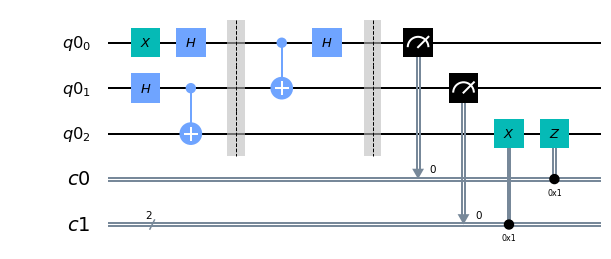

In [6]:
qc.x(2).c_if(crx,1)  # 'c_if' compares a classical register with a value (either 0 or 1) and performs the 
qc.z(2).c_if(crz,1)  # operation if they are equal.

qc.draw('mpl')
# be careful of the order of applying X and Z!

Now we have got our state $|\psi\rangle$ teleported to Bob! But how do we check it? We started with $|\psi\rangle$ as  $|-\rangle$ state. If we apply H gate to  $|\psi\rangle$, it will give us $|1\rangle$ state. Then we can measure to verify if we got a $|1\rangle$ by plotting a histogram. 

In [7]:
qc.h(2)
qc.measure(2,crx[1])

{'10 0': 2526, '11 0': 2501, '10 1': 2444, '11 1': 2529}


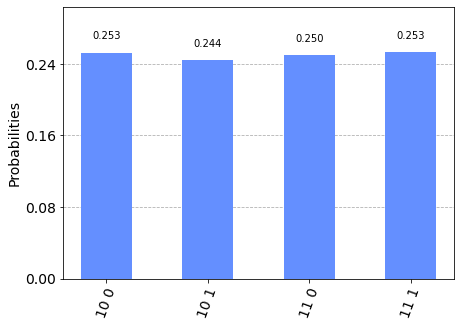

In [8]:
def run_circuit(qc):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 10000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc)
print(counts)
plot_histogram(counts)
# the output should be '1xx' if the teleportation is successful.

Depending on Alice’s measurement outcome, Bob’s qubit will end up in one of these four possible states. Of course, to know which state it is in, Bob must be told the result of Alice’s measurement (**classically**) - which prevents teleportation from transmitting information faster than light.  
That's the beauty of quantum mechanics - even though the state is decided instantly when the other qubit present in the EPR pair is measured, it would take a certain minimum time (restriction being the speed of light) for the 'spooky action at a distance' to help us teleport.

## Your task
 
(Hints follow)
You may think this is such a narrow topic; only one algorithm, nothing else to discuss.  

<img src = "https://raw.githubusercontent.com/mnp-club/Quantum_Computing_Workshop_2020/master/images/hold.jpg" width = '300' height = '300' ></img>  
And if you think this was an **incorrect use** of the meme you should definitely try this question.  
No teleportation, nothing. Home alone, Alice has 2 qubits as an EPR pair ( let's take $|\beta_{00}\rangle$). Her neighbour Skyler arrives at the door with an evil intention to apply a Pauli gate to one of her qubits. She leaves with a smirk which increases Alice's worry, as she knew Skyler definitely didn't come by just to discuss about **global warming**. She is paranoid and wants to know if Skyler messed with her EPR pair and if she did, which pauli gate she applied. However, she can measure only once because, of course, the qubits would no longer be in Bell state after that. She also doesn't have any extra qubits with her. Write a code which determines the Pauli gate Skyler applied exactly (Note to Self- It doesn't matter at what qubit the gate is applied since the system is in a symmetric state). You can plot histogram for measurement.

One last suggestion - 'It doesn't matter if the process serves its initial purpose, as long as it serves some other.'

 (**6 points**)

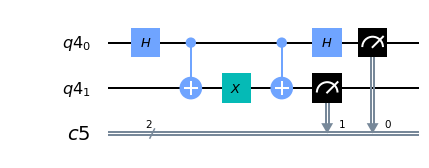

In [17]:
qr = QuantumRegister(2)
cr_xy = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr_xy)
qc.h(0)
qc.cx(0,1)
qc.x(1) #Apply Gate Here
qc.cx(0,1)
qc.measure(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw()

[0.+0.j 0.+0.j 1.-0.j 0.+0.j]
{'10': 10000}


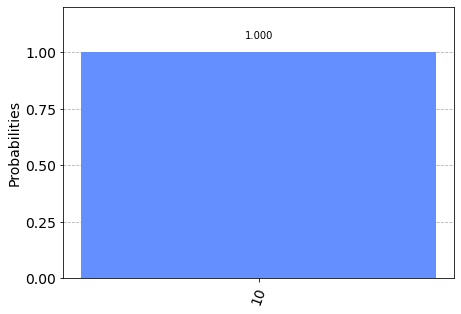

In [18]:
def run_circuit(qc):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 10000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc)
print(counts)
plot_histogram(counts) 

# 00 => No Gate
# 01 => Z
# 10 => X
# 11 => Y